#  Measurement of the zero of waveplate
***
* Eder Martioli, LNA 26 Feb 2025

This notebook presents an analysis of data collected during an engineering night with SPARC4 to measure the zero of the waveplate, based on observations of a circularly polarized standard star.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib
from uncertainties import ufloat

### Access to the reduced data :
The reduced data presented in this document as well as all reduced data from the engineering night with SPARC4 on Feb 24, 2025, are available for download at [Engineering 20250224](https://drive.google.com/drive/folders/1_bVizkJ1jjyxw4BnAAnbtSKVV1jhNZMl?usp=sharing).

# Circularly polarized standard: WD 1036-204
***
In this section we analyze the circularly polarized standard WD 1036-204

### Load file paths :

In [2]:
s2, s4 = [], []
p2, p4 = [], []

# change path below to the location where the reduced data are saved:
reducedir = "/Users/eder/Science/Transits-OPD_2024A/20250224/"

for ch in range(1,5) :
    s2_filepath = "{}/20250224_s4c{}_Gain2_1.0_Conventional_2_WD1036-204_POLAR_L2__stack.fits".format(reducedir,ch)
    s4_filepath = "{}/20250224_s4c{}_Gain2_1.0_Conventional_2_WD1036-204_POLAR_L4__stack.fits".format(reducedir,ch)
    p2_filepath = "{}/20250224_s4c{}_Gain2_1.0_Conventional_2_WD1036-204_POLAR_L2__polar.fits".format(reducedir,ch)
    p4_filepath = "{}/20250224_s4c{}_Gain2_1.0_Conventional_2_WD1036-204_POLAR_L4__polar.fits".format(reducedir,ch)
    s2.append(s2_filepath)
    s4.append(s4_filepath)
    p2.append(p2_filepath)
    p4.append(p4_filepath)

### Plot stack to visually identify target index:

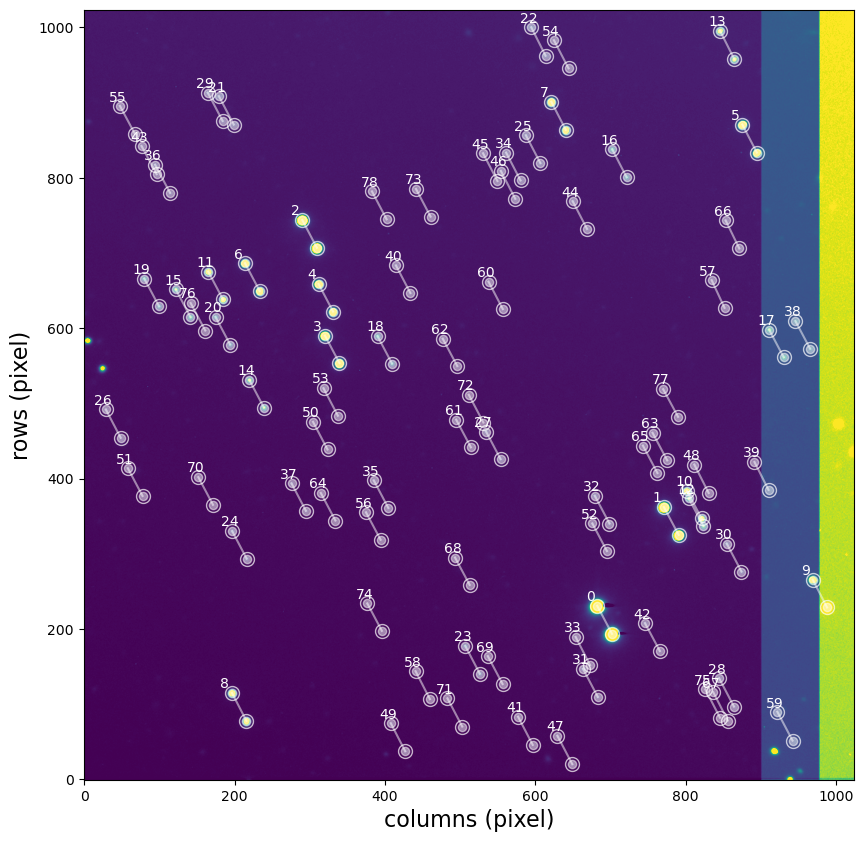

In [3]:
# set channel: 1 (g-band), 2 (r-band), 3 (i-band), or 4 (z-band)
channel = 2

# plot stack to check the stack image of the field and detected sources:
s4plt.plot_sci_polar_frame(s4[channel-1])

### Set index and make a first plot of the polarimetry:

/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/Users/eder/anaconda3/lib/python3.11/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
2025-05-10 00:45:16,080 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-05-10 00:45:16,080 | INFO | Substituting symbol \perp from STIXGeneral


2025-05-10 00:45:16,083 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-05-10 00:45:16,083 | INFO | Substituting symbol \perp from STIXGeneral


2025-05-10 00:45:16,190 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-05-10 00:45:16,190 | INFO | Substituting symbol \perp from STIXGeneral


2025-05-10 00:45:16,193 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-05-10 00:45:16,193 | INFO | Substituting symbol \perp from STIXGeneral


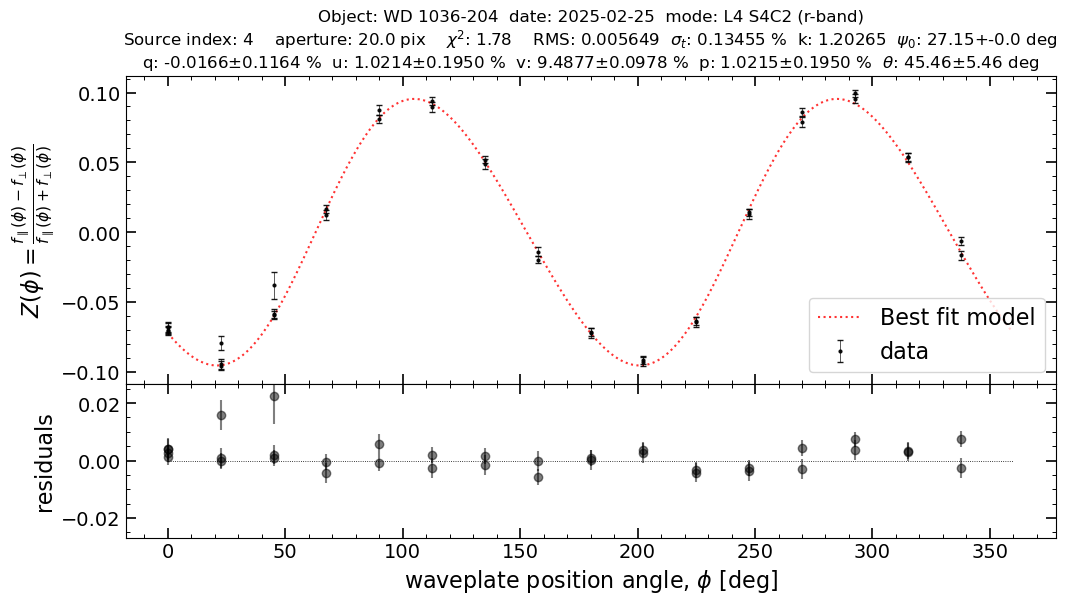

In [4]:
source_index = 4 # set target index
zero_guess = 27.15 # set zero of waveplate, in degrees

# get polarimetry results for the selected channel, source, and zero value:
pol_results = s4pipelib.get_polarimetry_results(p4[channel-1],
                                                source_index=source_index, 
                                                min_aperture=4,
                                                max_aperture=21,
                                                aperture_radius=20,
                                                plot=True,
                                                verbose=False,
                                                compute_k=True,
                                                zero=zero_guess)

### Select sampling of trial zeros, and set variables 

In [5]:
zeros = np.linspace(0, 180, num=180) # set array of trial zeros
mask = zeros < 200 # mask values to avoid double minima when full range is 360 deg
rms = [np.array([]), np.array([]), np.array([]), np.array([])]
chisqr = [np.array([]), np.array([]), np.array([]), np.array([])]
imin = [None, None, None, None]
source_index = [4,4,4,4]
colors = ["lightblue","darkgreen","darkorange","red"]
bands = ["g","r","i","z"]

### Calculate polarimetry for all trial zeros in the four channels

In [ ]:
# the loop may take a few minutes to run
for ch in range(1,5) :    
    for i in range(len(zeros)) :
        pol_results = s4pipelib.get_polarimetry_results(p4[ch-1],
                                                source_index=source_index[ch-1],
                                                min_aperture=4,
                                                max_aperture=21,
                                                compute_k=False,
                                                plot=False,
                                                verbose=False,
                                                zero=zeros[i])
        rms[ch-1] = np.append(rms[ch-1],pol_results['RMS'])
        chisqr[ch-1] = np.append(chisqr[ch-1],pol_results['CHI2'])

2025-05-10 00:45:22,612 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:22,612 | INFO | Normalization disabled.


2025-05-10 00:45:22,794 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:22,794 | INFO | Normalization disabled.


2025-05-10 00:45:22,978 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:22,978 | INFO | Normalization disabled.


2025-05-10 00:45:23,198 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:23,198 | INFO | Normalization disabled.


2025-05-10 00:45:23,380 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:23,380 | INFO | Normalization disabled.


2025-05-10 00:45:23,569 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:23,569 | INFO | Normalization disabled.


2025-05-10 00:45:23,791 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:23,791 | INFO | Normalization disabled.


2025-05-10 00:45:23,984 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:23,984 | INFO | Normalization disabled.


2025-05-10 00:45:24,221 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:24,221 | INFO | Normalization disabled.


2025-05-10 00:45:24,414 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:24,414 | INFO | Normalization disabled.


2025-05-10 00:45:24,601 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:24,601 | INFO | Normalization disabled.


2025-05-10 00:45:24,828 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:24,828 | INFO | Normalization disabled.


2025-05-10 00:45:25,016 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:25,016 | INFO | Normalization disabled.


2025-05-10 00:45:25,256 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:25,256 | INFO | Normalization disabled.


2025-05-10 00:45:25,446 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:25,446 | INFO | Normalization disabled.


2025-05-10 00:45:25,629 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:25,629 | INFO | Normalization disabled.


2025-05-10 00:45:25,853 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:25,853 | INFO | Normalization disabled.


2025-05-10 00:45:26,046 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:26,046 | INFO | Normalization disabled.


2025-05-10 00:45:26,288 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:26,288 | INFO | Normalization disabled.


2025-05-10 00:45:26,480 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:26,480 | INFO | Normalization disabled.


2025-05-10 00:45:26,670 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:26,670 | INFO | Normalization disabled.


2025-05-10 00:45:26,906 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:26,906 | INFO | Normalization disabled.


2025-05-10 00:45:27,099 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:27,099 | INFO | Normalization disabled.


2025-05-10 00:45:27,289 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:27,289 | INFO | Normalization disabled.


2025-05-10 00:45:27,514 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:27,514 | INFO | Normalization disabled.


2025-05-10 00:45:27,694 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:27,694 | INFO | Normalization disabled.


2025-05-10 00:45:27,919 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:27,919 | INFO | Normalization disabled.


2025-05-10 00:45:28,107 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:28,107 | INFO | Normalization disabled.


2025-05-10 00:45:28,291 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:28,291 | INFO | Normalization disabled.


2025-05-10 00:45:28,514 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:28,514 | INFO | Normalization disabled.


2025-05-10 00:45:28,712 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:28,712 | INFO | Normalization disabled.


2025-05-10 00:45:28,906 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:28,906 | INFO | Normalization disabled.


2025-05-10 00:45:29,143 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:29,143 | INFO | Normalization disabled.


2025-05-10 00:45:29,329 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:29,329 | INFO | Normalization disabled.


2025-05-10 00:45:29,555 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:29,555 | INFO | Normalization disabled.


2025-05-10 00:45:29,740 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:29,740 | INFO | Normalization disabled.


2025-05-10 00:45:29,923 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:29,923 | INFO | Normalization disabled.


2025-05-10 00:45:30,145 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:30,145 | INFO | Normalization disabled.


2025-05-10 00:45:30,333 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:30,333 | INFO | Normalization disabled.


2025-05-10 00:45:30,513 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:30,513 | INFO | Normalization disabled.


2025-05-10 00:45:30,731 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:30,731 | INFO | Normalization disabled.


2025-05-10 00:45:30,912 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:30,912 | INFO | Normalization disabled.


2025-05-10 00:45:31,133 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:31,133 | INFO | Normalization disabled.


2025-05-10 00:45:31,313 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:31,313 | INFO | Normalization disabled.


2025-05-10 00:45:31,497 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:31,497 | INFO | Normalization disabled.


2025-05-10 00:45:31,714 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:31,714 | INFO | Normalization disabled.


2025-05-10 00:45:31,897 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:31,897 | INFO | Normalization disabled.


2025-05-10 00:45:32,076 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:32,076 | INFO | Normalization disabled.


2025-05-10 00:45:32,290 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:32,290 | INFO | Normalization disabled.


2025-05-10 00:45:32,471 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:32,471 | INFO | Normalization disabled.


2025-05-10 00:45:32,650 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:32,650 | INFO | Normalization disabled.


2025-05-10 00:45:32,863 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:32,863 | INFO | Normalization disabled.


2025-05-10 00:45:33,042 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:33,042 | INFO | Normalization disabled.


2025-05-10 00:45:33,260 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:33,260 | INFO | Normalization disabled.


2025-05-10 00:45:33,441 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:33,441 | INFO | Normalization disabled.


2025-05-10 00:45:33,657 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:33,657 | INFO | Normalization disabled.


2025-05-10 00:45:33,842 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:33,842 | INFO | Normalization disabled.


2025-05-10 00:45:34,029 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:34,029 | INFO | Normalization disabled.


2025-05-10 00:45:34,249 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:34,249 | INFO | Normalization disabled.


2025-05-10 00:45:34,435 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:34,435 | INFO | Normalization disabled.


2025-05-10 00:45:34,646 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:34,646 | INFO | Normalization disabled.


2025-05-10 00:45:34,899 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:34,899 | INFO | Normalization disabled.


2025-05-10 00:45:35,111 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:35,111 | INFO | Normalization disabled.


2025-05-10 00:45:35,337 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:35,337 | INFO | Normalization disabled.


2025-05-10 00:45:35,529 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:35,529 | INFO | Normalization disabled.


2025-05-10 00:45:35,719 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:35,719 | INFO | Normalization disabled.


2025-05-10 00:45:35,947 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:35,947 | INFO | Normalization disabled.


2025-05-10 00:45:36,127 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:36,127 | INFO | Normalization disabled.


2025-05-10 00:45:36,348 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:36,348 | INFO | Normalization disabled.


2025-05-10 00:45:36,535 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:36,535 | INFO | Normalization disabled.


2025-05-10 00:45:36,721 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:36,721 | INFO | Normalization disabled.


2025-05-10 00:45:36,944 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:36,944 | INFO | Normalization disabled.


2025-05-10 00:45:37,128 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:37,128 | INFO | Normalization disabled.


2025-05-10 00:45:37,351 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:37,351 | INFO | Normalization disabled.


2025-05-10 00:45:37,537 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:37,537 | INFO | Normalization disabled.


2025-05-10 00:45:37,718 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:37,718 | INFO | Normalization disabled.


2025-05-10 00:45:37,941 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:37,941 | INFO | Normalization disabled.


2025-05-10 00:45:38,128 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:38,128 | INFO | Normalization disabled.


2025-05-10 00:45:38,311 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:38,311 | INFO | Normalization disabled.


2025-05-10 00:45:38,530 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:38,530 | INFO | Normalization disabled.


2025-05-10 00:45:38,716 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:38,716 | INFO | Normalization disabled.


2025-05-10 00:45:38,945 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:38,945 | INFO | Normalization disabled.


2025-05-10 00:45:39,147 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:39,147 | INFO | Normalization disabled.


2025-05-10 00:45:39,344 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:39,344 | INFO | Normalization disabled.


2025-05-10 00:45:39,571 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:39,571 | INFO | Normalization disabled.


2025-05-10 00:45:39,757 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:39,757 | INFO | Normalization disabled.


2025-05-10 00:45:39,941 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:39,941 | INFO | Normalization disabled.


2025-05-10 00:45:40,157 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:40,157 | INFO | Normalization disabled.


2025-05-10 00:45:40,342 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:40,342 | INFO | Normalization disabled.


2025-05-10 00:45:40,565 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:40,565 | INFO | Normalization disabled.


2025-05-10 00:45:40,751 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:40,751 | INFO | Normalization disabled.


2025-05-10 00:45:40,932 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:40,932 | INFO | Normalization disabled.


2025-05-10 00:45:41,158 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:41,158 | INFO | Normalization disabled.


2025-05-10 00:45:41,349 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:41,349 | INFO | Normalization disabled.


2025-05-10 00:45:41,568 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:41,568 | INFO | Normalization disabled.


2025-05-10 00:45:41,760 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:41,760 | INFO | Normalization disabled.


2025-05-10 00:45:41,986 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:41,986 | INFO | Normalization disabled.


2025-05-10 00:45:42,168 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:42,168 | INFO | Normalization disabled.


2025-05-10 00:45:42,356 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:42,356 | INFO | Normalization disabled.


2025-05-10 00:45:42,581 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:42,581 | INFO | Normalization disabled.


2025-05-10 00:45:42,780 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:42,780 | INFO | Normalization disabled.


2025-05-10 00:45:42,974 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:42,974 | INFO | Normalization disabled.


2025-05-10 00:45:43,197 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:43,197 | INFO | Normalization disabled.


2025-05-10 00:45:43,392 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:43,392 | INFO | Normalization disabled.


2025-05-10 00:45:43,624 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:43,624 | INFO | Normalization disabled.


2025-05-10 00:45:43,816 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:43,816 | INFO | Normalization disabled.


2025-05-10 00:45:44,002 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:44,002 | INFO | Normalization disabled.


2025-05-10 00:45:44,223 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:44,223 | INFO | Normalization disabled.


2025-05-10 00:45:44,405 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:44,405 | INFO | Normalization disabled.


2025-05-10 00:45:44,620 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:44,620 | INFO | Normalization disabled.


2025-05-10 00:45:44,800 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:44,800 | INFO | Normalization disabled.


2025-05-10 00:45:44,992 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:44,992 | INFO | Normalization disabled.


2025-05-10 00:45:45,253 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:45,253 | INFO | Normalization disabled.


2025-05-10 00:45:45,468 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:45,468 | INFO | Normalization disabled.


2025-05-10 00:45:45,700 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:45,700 | INFO | Normalization disabled.


2025-05-10 00:45:45,886 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:45,886 | INFO | Normalization disabled.


2025-05-10 00:45:46,069 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:46,069 | INFO | Normalization disabled.


2025-05-10 00:45:46,289 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:46,289 | INFO | Normalization disabled.


2025-05-10 00:45:46,475 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:46,475 | INFO | Normalization disabled.


2025-05-10 00:45:46,699 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:46,699 | INFO | Normalization disabled.


2025-05-10 00:45:46,886 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:46,886 | INFO | Normalization disabled.


2025-05-10 00:45:47,076 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:47,076 | INFO | Normalization disabled.


2025-05-10 00:45:47,296 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:47,296 | INFO | Normalization disabled.


2025-05-10 00:45:47,477 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:47,477 | INFO | Normalization disabled.


2025-05-10 00:45:47,660 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:47,660 | INFO | Normalization disabled.


2025-05-10 00:45:47,881 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:47,881 | INFO | Normalization disabled.


2025-05-10 00:45:48,066 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:48,066 | INFO | Normalization disabled.


2025-05-10 00:45:48,257 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:48,257 | INFO | Normalization disabled.


2025-05-10 00:45:48,472 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:48,472 | INFO | Normalization disabled.


2025-05-10 00:45:48,657 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:48,657 | INFO | Normalization disabled.


2025-05-10 00:45:48,876 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:48,876 | INFO | Normalization disabled.


2025-05-10 00:45:49,057 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:49,057 | INFO | Normalization disabled.


2025-05-10 00:45:49,237 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:49,237 | INFO | Normalization disabled.


2025-05-10 00:45:49,455 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:49,455 | INFO | Normalization disabled.


2025-05-10 00:45:49,639 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:49,639 | INFO | Normalization disabled.


2025-05-10 00:45:49,858 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:49,858 | INFO | Normalization disabled.


2025-05-10 00:45:50,038 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:50,038 | INFO | Normalization disabled.


2025-05-10 00:45:50,222 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:50,222 | INFO | Normalization disabled.


2025-05-10 00:45:50,434 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:50,434 | INFO | Normalization disabled.


2025-05-10 00:45:50,616 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:50,616 | INFO | Normalization disabled.


2025-05-10 00:45:50,835 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:50,835 | INFO | Normalization disabled.


2025-05-10 00:45:51,022 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:51,022 | INFO | Normalization disabled.


2025-05-10 00:45:51,202 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:51,202 | INFO | Normalization disabled.


2025-05-10 00:45:51,433 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:51,433 | INFO | Normalization disabled.


2025-05-10 00:45:51,620 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:51,620 | INFO | Normalization disabled.


2025-05-10 00:45:51,801 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:51,801 | INFO | Normalization disabled.


2025-05-10 00:45:52,014 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:52,014 | INFO | Normalization disabled.


2025-05-10 00:45:52,199 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:52,199 | INFO | Normalization disabled.


2025-05-10 00:45:52,416 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:52,416 | INFO | Normalization disabled.


2025-05-10 00:45:52,597 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:52,597 | INFO | Normalization disabled.


2025-05-10 00:45:52,777 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:52,777 | INFO | Normalization disabled.


2025-05-10 00:45:52,993 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:52,993 | INFO | Normalization disabled.


2025-05-10 00:45:53,174 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:53,174 | INFO | Normalization disabled.


2025-05-10 00:45:53,353 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:53,353 | INFO | Normalization disabled.


2025-05-10 00:45:53,567 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:53,567 | INFO | Normalization disabled.


2025-05-10 00:45:53,749 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:53,749 | INFO | Normalization disabled.


2025-05-10 00:45:53,967 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:53,967 | INFO | Normalization disabled.


2025-05-10 00:45:54,162 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:54,162 | INFO | Normalization disabled.


2025-05-10 00:45:54,351 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:54,351 | INFO | Normalization disabled.


2025-05-10 00:45:54,572 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:54,572 | INFO | Normalization disabled.


2025-05-10 00:45:54,755 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:54,755 | INFO | Normalization disabled.


2025-05-10 00:45:54,940 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:54,940 | INFO | Normalization disabled.


2025-05-10 00:45:55,153 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:55,153 | INFO | Normalization disabled.


2025-05-10 00:45:55,338 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:55,338 | INFO | Normalization disabled.


2025-05-10 00:45:55,557 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:55,557 | INFO | Normalization disabled.


2025-05-10 00:45:55,744 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:55,744 | INFO | Normalization disabled.


2025-05-10 00:45:55,925 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:55,925 | INFO | Normalization disabled.


2025-05-10 00:45:56,142 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:56,142 | INFO | Normalization disabled.


2025-05-10 00:45:56,328 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:56,328 | INFO | Normalization disabled.


2025-05-10 00:45:56,555 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:56,555 | INFO | Normalization disabled.


2025-05-10 00:45:56,744 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:56,744 | INFO | Normalization disabled.


2025-05-10 00:45:56,923 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:56,923 | INFO | Normalization disabled.


2025-05-10 00:45:57,143 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:57,143 | INFO | Normalization disabled.


2025-05-10 00:45:57,328 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:57,328 | INFO | Normalization disabled.


2025-05-10 00:45:57,551 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:57,551 | INFO | Normalization disabled.


2025-05-10 00:45:57,745 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:57,745 | INFO | Normalization disabled.


2025-05-10 00:45:57,940 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:57,940 | INFO | Normalization disabled.


2025-05-10 00:45:58,175 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:58,175 | INFO | Normalization disabled.


2025-05-10 00:45:58,369 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:58,369 | INFO | Normalization disabled.


2025-05-10 00:45:58,605 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:58,605 | INFO | Normalization disabled.


2025-05-10 00:45:58,805 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:58,805 | INFO | Normalization disabled.


2025-05-10 00:45:59,001 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:59,001 | INFO | Normalization disabled.


2025-05-10 00:45:59,240 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:59,240 | INFO | Normalization disabled.


2025-05-10 00:45:59,434 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:59,434 | INFO | Normalization disabled.


2025-05-10 00:45:59,627 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:59,627 | INFO | Normalization disabled.


2025-05-10 00:45:59,851 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:45:59,851 | INFO | Normalization disabled.


2025-05-10 00:46:00,036 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:00,036 | INFO | Normalization disabled.


2025-05-10 00:46:00,279 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:00,279 | INFO | Normalization disabled.


2025-05-10 00:46:00,479 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:00,479 | INFO | Normalization disabled.


2025-05-10 00:46:00,670 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:00,670 | INFO | Normalization disabled.


2025-05-10 00:46:00,889 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:00,889 | INFO | Normalization disabled.


2025-05-10 00:46:01,070 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:01,070 | INFO | Normalization disabled.


2025-05-10 00:46:01,283 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:01,283 | INFO | Normalization disabled.


2025-05-10 00:46:01,470 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:01,470 | INFO | Normalization disabled.


2025-05-10 00:46:01,655 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:01,655 | INFO | Normalization disabled.


2025-05-10 00:46:01,875 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:01,875 | INFO | Normalization disabled.


2025-05-10 00:46:02,057 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:02,057 | INFO | Normalization disabled.


2025-05-10 00:46:02,276 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:02,276 | INFO | Normalization disabled.


2025-05-10 00:46:02,462 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:02,462 | INFO | Normalization disabled.


2025-05-10 00:46:02,642 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:02,642 | INFO | Normalization disabled.


2025-05-10 00:46:02,860 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:02,860 | INFO | Normalization disabled.


2025-05-10 00:46:03,047 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:03,047 | INFO | Normalization disabled.


2025-05-10 00:46:03,263 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:03,263 | INFO | Normalization disabled.


2025-05-10 00:46:03,452 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:03,452 | INFO | Normalization disabled.


2025-05-10 00:46:03,634 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:03,634 | INFO | Normalization disabled.


2025-05-10 00:46:03,878 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:03,878 | INFO | Normalization disabled.


2025-05-10 00:46:04,065 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:04,065 | INFO | Normalization disabled.


2025-05-10 00:46:04,273 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:04,273 | INFO | Normalization disabled.


2025-05-10 00:46:04,522 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:04,522 | INFO | Normalization disabled.


2025-05-10 00:46:04,733 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:04,733 | INFO | Normalization disabled.


2025-05-10 00:46:04,955 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:04,955 | INFO | Normalization disabled.


2025-05-10 00:46:05,139 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:05,139 | INFO | Normalization disabled.


2025-05-10 00:46:05,323 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:05,323 | INFO | Normalization disabled.


2025-05-10 00:46:05,537 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:05,537 | INFO | Normalization disabled.


2025-05-10 00:46:05,723 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:05,723 | INFO | Normalization disabled.


2025-05-10 00:46:05,940 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:05,940 | INFO | Normalization disabled.


2025-05-10 00:46:06,122 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:06,122 | INFO | Normalization disabled.


2025-05-10 00:46:06,308 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:06,308 | INFO | Normalization disabled.


2025-05-10 00:46:06,522 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:06,522 | INFO | Normalization disabled.


2025-05-10 00:46:06,713 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:06,713 | INFO | Normalization disabled.


2025-05-10 00:46:06,945 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:06,945 | INFO | Normalization disabled.


2025-05-10 00:46:07,142 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:07,142 | INFO | Normalization disabled.


2025-05-10 00:46:07,334 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:07,334 | INFO | Normalization disabled.


2025-05-10 00:46:07,565 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:07,565 | INFO | Normalization disabled.


2025-05-10 00:46:07,755 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:07,755 | INFO | Normalization disabled.


2025-05-10 00:46:07,989 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:07,989 | INFO | Normalization disabled.


2025-05-10 00:46:08,193 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:08,193 | INFO | Normalization disabled.


2025-05-10 00:46:08,385 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:08,385 | INFO | Normalization disabled.


2025-05-10 00:46:08,613 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:08,613 | INFO | Normalization disabled.


2025-05-10 00:46:08,801 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:08,801 | INFO | Normalization disabled.


2025-05-10 00:46:09,020 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:09,020 | INFO | Normalization disabled.


2025-05-10 00:46:09,207 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:09,207 | INFO | Normalization disabled.


2025-05-10 00:46:09,391 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:09,391 | INFO | Normalization disabled.


2025-05-10 00:46:09,610 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:09,610 | INFO | Normalization disabled.


2025-05-10 00:46:09,797 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:09,797 | INFO | Normalization disabled.


2025-05-10 00:46:09,978 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:09,978 | INFO | Normalization disabled.


2025-05-10 00:46:10,190 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:10,190 | INFO | Normalization disabled.


2025-05-10 00:46:10,375 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:10,375 | INFO | Normalization disabled.


2025-05-10 00:46:10,556 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:10,556 | INFO | Normalization disabled.


2025-05-10 00:46:10,771 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:10,771 | INFO | Normalization disabled.


2025-05-10 00:46:10,952 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:10,952 | INFO | Normalization disabled.


2025-05-10 00:46:11,165 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:11,165 | INFO | Normalization disabled.


2025-05-10 00:46:11,347 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:11,347 | INFO | Normalization disabled.


2025-05-10 00:46:11,528 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:11,528 | INFO | Normalization disabled.


2025-05-10 00:46:11,748 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:11,748 | INFO | Normalization disabled.


2025-05-10 00:46:11,929 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:11,929 | INFO | Normalization disabled.


2025-05-10 00:46:12,143 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:12,143 | INFO | Normalization disabled.


2025-05-10 00:46:12,329 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:12,329 | INFO | Normalization disabled.


2025-05-10 00:46:12,508 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:12,508 | INFO | Normalization disabled.


2025-05-10 00:46:12,722 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:12,722 | INFO | Normalization disabled.


2025-05-10 00:46:12,903 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:12,903 | INFO | Normalization disabled.


2025-05-10 00:46:13,122 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:13,122 | INFO | Normalization disabled.


2025-05-10 00:46:13,305 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:13,305 | INFO | Normalization disabled.


2025-05-10 00:46:13,490 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:13,490 | INFO | Normalization disabled.


2025-05-10 00:46:13,706 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:13,706 | INFO | Normalization disabled.


2025-05-10 00:46:13,889 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:13,889 | INFO | Normalization disabled.


2025-05-10 00:46:14,109 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:14,109 | INFO | Normalization disabled.


2025-05-10 00:46:14,293 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:14,293 | INFO | Normalization disabled.


2025-05-10 00:46:14,474 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:14,474 | INFO | Normalization disabled.


2025-05-10 00:46:14,687 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:14,687 | INFO | Normalization disabled.


2025-05-10 00:46:14,871 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:14,871 | INFO | Normalization disabled.


2025-05-10 00:46:15,053 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:15,053 | INFO | Normalization disabled.


2025-05-10 00:46:15,273 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:15,273 | INFO | Normalization disabled.


2025-05-10 00:46:15,458 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:15,458 | INFO | Normalization disabled.


2025-05-10 00:46:15,684 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:15,684 | INFO | Normalization disabled.


2025-05-10 00:46:15,870 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:15,870 | INFO | Normalization disabled.


2025-05-10 00:46:16,051 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:16,051 | INFO | Normalization disabled.


2025-05-10 00:46:16,266 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:16,266 | INFO | Normalization disabled.


2025-05-10 00:46:16,452 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:16,452 | INFO | Normalization disabled.


2025-05-10 00:46:16,639 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:16,639 | INFO | Normalization disabled.


2025-05-10 00:46:16,863 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:16,863 | INFO | Normalization disabled.


2025-05-10 00:46:17,055 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:17,055 | INFO | Normalization disabled.


2025-05-10 00:46:17,286 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:17,286 | INFO | Normalization disabled.


2025-05-10 00:46:17,479 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:17,479 | INFO | Normalization disabled.


2025-05-10 00:46:17,672 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:17,672 | INFO | Normalization disabled.


2025-05-10 00:46:17,903 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:17,903 | INFO | Normalization disabled.


2025-05-10 00:46:18,095 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:18,095 | INFO | Normalization disabled.


2025-05-10 00:46:18,318 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:18,318 | INFO | Normalization disabled.


2025-05-10 00:46:18,499 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:18,499 | INFO | Normalization disabled.


2025-05-10 00:46:18,682 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:18,682 | INFO | Normalization disabled.


2025-05-10 00:46:18,918 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:18,918 | INFO | Normalization disabled.


2025-05-10 00:46:19,129 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:19,129 | INFO | Normalization disabled.


2025-05-10 00:46:19,333 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:19,333 | INFO | Normalization disabled.


2025-05-10 00:46:19,563 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:19,563 | INFO | Normalization disabled.


2025-05-10 00:46:19,754 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:19,754 | INFO | Normalization disabled.


2025-05-10 00:46:19,980 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:19,980 | INFO | Normalization disabled.


2025-05-10 00:46:20,174 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:20,174 | INFO | Normalization disabled.


2025-05-10 00:46:20,358 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:20,358 | INFO | Normalization disabled.


2025-05-10 00:46:20,579 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:20,579 | INFO | Normalization disabled.


2025-05-10 00:46:20,765 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:20,765 | INFO | Normalization disabled.


2025-05-10 00:46:20,997 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:20,997 | INFO | Normalization disabled.


2025-05-10 00:46:21,189 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:21,189 | INFO | Normalization disabled.


2025-05-10 00:46:21,372 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:21,372 | INFO | Normalization disabled.


2025-05-10 00:46:21,590 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:21,590 | INFO | Normalization disabled.


2025-05-10 00:46:21,774 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:21,774 | INFO | Normalization disabled.


2025-05-10 00:46:21,992 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:21,992 | INFO | Normalization disabled.


2025-05-10 00:46:22,187 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:22,187 | INFO | Normalization disabled.


2025-05-10 00:46:22,396 astropop - INFO - Normalization disabled.  [__init__]


2025-05-10 00:46:22,396 | INFO | Normalization disabled.


### Plot results to find the best value of zeros

In [ ]:
mask = zeros < 90 # mask values to avoid double minima when full range is 360 deg

min_zeros = np.array([])
for ch in range(1,5) :        
    #imin[ch-1] = np.argmin(rms[ch-1][mask])
    #min_zero = zeros[mask][imin[ch-1]]
    #min_zeros = np.append(min_zeros,min_zero)
    #plt.plot(zeros,rms[ch-1],color=colors[ch-1],label="{}-band".format(bands[ch-1]))
    #plt.vlines(min_zero, 0, np.max(rms[ch-1]), ls=":", color=colors[ch-1], label="{:.2f} deg".format(min_zero))
    
    imin[ch-1] = np.argmin(chisqr[ch-1][mask])
    min_zero = zeros[mask][imin[ch-1]]
    min_zeros = np.append(min_zeros,min_zero) 
    maxchi2 = np.max(chisqr[ch-1])
    plt.plot(zeros,chisqr[ch-1]/maxchi2,color=colors[ch-1],label="{}-band".format(bands[ch-1]))
    plt.vlines(min_zero, 0, 1.0, ls=":", color=colors[ch-1], label="{:.2f} deg".format(min_zero))

plt.xlim(0,90)
plt.ylim(0,1)
plt.xlabel("Zero of waveplate (deg)")
#plt.ylabel("RMS")
plt.ylabel("Chi-square")
plt.legend()
plt.show()     

### Calculate mean value and uncertainty  :

In [ ]:
final_zero = ufloat(np.mean(min_zeros), np.std(min_zeros))
print("{} deg".format(final_zero))